In [30]:

#by Henry Schumacher
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import os
import sys
import json
import uuid
import xraydb
import plotly
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import numpy as np
import pandas as pd
# import pyxray as xy
import seaborn as sb
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],
    "text.usetex": True,
    "font.size": 8,
    "pgf.rcfonts": False
})
# rc('font',**{'family':'serif','serif':['Times']})
# rc('text', usetex=True)
# plt.rcParams.update({'font.size': 8})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": "\n".join([
          r"\usepackage{mathtools}",
     ]),
})
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
def dual_print(*args, **kwargs):
    print(*args)
    with open('bins_matching_log.txt', 'a') as out:
        print(*args, **kwargs, file=out)
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
from RootToPythonConverter.json_to_np import *
from RootToPythonConverter.colors import load_colors
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#


mac = hex(uuid.getnode())
print(f"MAC address: {mac}")

mac_dict = {'0xb6ab0b4445f9': ['C://Users//schum//Documents//Filing Cabinet//1_RootFilesGeant4', 'C://Users//schum//Documents//Filing Cabinet//2_jsonFiles'], # Office
            '0x145afc4fe836': ['D://root_files_temp_storage', 'D://json_files_temp_storage'], # Laptop
            '0x1a7dda7115'  : ['B://IBA//root', 'B://IBA//json']} # Home PC
# Each mac adresse leads to a pair of paths, the first being the folder, 
# where the root files are, the second, where the json files are supposed to be stored
# root_path = mac_dict[mac][0]
json_path = mac_dict[mac][1]

color_schemes = load_colors()
print(color_schemes)

MAC address: 0x145afc4fe836
{'c_rainbow': ['#690000', '#C1292E', '#e08e45', '#E0BE36', '#7A8C2A', '#0D863D', '#2d82b7', '#740091'], 'c_complementary': ['#D90368', '#D4C200', '#2CDA9D', '#BA3B46', '#FA824C', '#3C91E6', '#009528', '#6689C6'], 'c_violetorange': ['#5E0ABF', '#701AA4', '#82298A', '#94396F', '#A64854', '#B85839', '#CA671F', '#DC7704']}


In [9]:
PARAM_XRAY_L = {'mask_min': 0.,     # Minimum Edge
              'mask_max':0.01,      # 10 keV 
              'title': 'X-ray spectrum up to 10 keV',
              'peak_height': 10     # Peak height for detection
              }

PARAM_XRAY_H = {'mask_min': 0.,     # Minimum Edge
              'mask_max':0.1,       # 10 keV 
              'title': 'X-ray spectrum up to 100 keV',
              'peak_height': 100    # Peak height for detection
              }

PARAM_GAMMA = {'mask_min': 0.,
               'mask_max': 2.,
               'title': 'Gamma spectrum up to 2 MeV',
               'peak_height': 1000   # Peak height for detection
              }

In [10]:
def xray_line_searcher(energy_low, energy_high):
    '''
    energy_low/high: in eV
    '''
    matching = []
    xray_line_path = './/xraylines.json'
    
    if (xraydb.xray_lines('Fe') != {}):
        for Z in range(1, 101):  # Elements from Hydrogen (Z=1) to Fermium (Z=100)
            element = xraydb.atomic_symbol(Z)
            # Get all known X-ray lines for the element
            try:
                lines = xraydb.xray_lines(element)
            except Exception:
                continue  # Skip elements that don't have data
            
            # print(lines)
            for line_id, line in lines.items():
                line_energy = line.energy  # Energy in keV
                if (energy_low <= line_energy and line_energy <= energy_high):
                    matching.append({
                        'element': element,
                        'Z': Z,
                        'transition': line_id,
                        'energy_eV': line_energy,
                        'intensity': line.intensity
                    })
    else: #the data extraction has to be fixed.
        with open(xray_line_path, "r") as j:
            xraydata = json.load(j)
        for Z in range(1,101):
            element = xraydb.atomic_symbol(Z)
            try:
                lines = xraydata[element]
            except Exception:
                continue
            
            for line_id, line in lines.items():
                line_energy = line.energy  # Energy in keV
                if (energy_low <= line_energy and line_energy <= energy_high):
                    matching.append({
                        'element': element,
                        'Z': Z,
                        'transition': line_id,
                        'energy_eV': line_energy,
                        'intensity': line.intensity
                    })

    return matching

In [11]:
print(xray_line_searcher(100,3000))

[{'element': 'Be', 'Z': 4, 'transition': 'Ka3', 'energy_eV': 103.5, 'intensity': 4.87326e-05}, {'element': 'Be', 'Z': 4, 'transition': 'Ka2', 'energy_eV': 108.5, 'intensity': 0.334205}, {'element': 'Be', 'Z': 4, 'transition': 'Ka1', 'energy_eV': 108.5, 'intensity': 0.665747}, {'element': 'B', 'Z': 5, 'transition': 'Ka3', 'energy_eV': 175.4, 'intensity': 6.09151e-05}, {'element': 'B', 'Z': 5, 'transition': 'Ka2', 'energy_eV': 183.3, 'intensity': 0.334201}, {'element': 'B', 'Z': 5, 'transition': 'Ka1', 'energy_eV': 183.3, 'intensity': 0.665738}, {'element': 'C', 'Z': 6, 'transition': 'Ka3', 'energy_eV': 266.2, 'intensity': 7.30972e-05}, {'element': 'C', 'Z': 6, 'transition': 'Ka2', 'energy_eV': 277.0, 'intensity': 0.334197}, {'element': 'C', 'Z': 6, 'transition': 'Ka1', 'energy_eV': 277.0, 'intensity': 0.66573}, {'element': 'N', 'Z': 7, 'transition': 'Ka3', 'energy_eV': 372.6, 'intensity': 8.5279e-05}, {'element': 'N', 'Z': 7, 'transition': 'Ka2', 'energy_eV': 392.4, 'intensity': 0.33419

In [12]:
def peak_text_prompter(peaks, bin_edges, delta_bin):
    '''
    Energies from this function are in keV! \n
    '''
    energy_bins = {}
    output = open('bins_matching_log.txt', 'w')
    
    dual_print('--'.ljust(80,'-'))
    dual_print('Bin'.ljust(8) + '| ' + 'E_range (eV)'.ljust(18) + '| ' + 'El.'.ljust(4)  + '| ' + 'Line'.ljust(6) + '| ' + 'Energy (eV)'.ljust(12) + '| ' + 'Int.'.ljust(6))
    
    for p in peaks:
        energy_bins[p] = [bin_edges[p], bin_edges[p] + delta_bin/2, bin_edges[p+1]]
        
        E_low = round(energy_bins[p][0]*10**6,4)
        E_high = round(energy_bins[p][2]*10**6,4)
        matching = xray_line_searcher(E_low, E_high)
        # print(matching[0])
        # print(energy_bins[p])
        dual_print(f'Bin {p}'.ljust(8) + '| ' + f'{round(energy_bins[p][0]*10**6,1)} - {round(energy_bins[p][2]*10**6,1)}'.ljust(18) + '| ' + '-'.ljust(33,'-'))
        
        for line in matching:
            dual_print(''.ljust(28) + '| ' + str(line['element']).ljust(4) + '| ' + str(line['transition']).ljust(6) + '| ' + str(line['energy_eV']).ljust(12) + '| ' + str(round(line['intensity'],3)).ljust(6))
    return True

#print(t[2].ljust(30) + '| ' + t[5].ljust(20) + '| ' + t[4].ljust(32) + '| ' + longstop.ljust(32) + '| ' + t[0].ljust(10) + '| ' + ''.ljust(10) + '| ' + '\n' + '--'.ljust(145,'-'))

In [28]:
def array_to_histo(prm, data, mask_min = 0., mask_max = 0.015, yscale = 'linear'):
    '''
    MANDATORY: \n
    prm = set of parameters [PARAM_XRAY_L, PARAM_XRAY_H, PARAM_GAMMA] \n
    data = numpy array \n
    OPTIONAL: \n
    mask_max = float; in MeV
    yscale = ['linear', 'log']
    '''
    if prm != {}:
        mask_min = prm['mask_min']
        mask_max = prm['mask_max']
        title = prm['title']
        peak_height = prm['peak_height']
    
    B = int(mask_max/0.00012 - mask_min/0.00012)
    print(B)
    min_cut_data = data[data >= mask_min]
    counts, bin_edges = np.histogram(min_cut_data[min_cut_data <= mask_max], bins=B)
    delta_bin = abs(bin_edges[0] - bin_edges[1])

    # print("Counts:", counts)
    # print("Bin edges:", bin_edges)
    peaks, properties = find_peaks(counts, height=peak_height)
    # print(peaks)
    
    plt.figure(figsize=(5,3), dpi=300)
    if (B < 250):
        plt.hist(min_cut_data[min_cut_data <= mask_max], bins=B, color="#C6C6C6", edgecolor='#C6C6C6', zorder=2, label='Full spectrum')
    
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    selected_counts = counts[peaks]
    selected_centers = bin_centers[peaks]
    selected_widths = np.diff(bin_edges)[peaks]

    # Plot only selected bins as a bar chart
    plt.bar(selected_centers, selected_counts, width=selected_widths, color="#0F50B2", edgecolor='#0F50B2', zorder=3, label='Peaks')
    if (B < 250):
        for b in range(len(selected_centers)):
            plt.text(x=bin_edges[peaks][b], y=selected_counts[b]*1.2, s=f'Bin {peaks[b]}', fontdict={'fontsize':7, 'rotation':90})
        peak_text_prompter(peaks, bin_edges, delta_bin)
    # plt.plot(bin_edges[peaks]+ delta_bin/2, counts[peaks], 'bx', label='Prominent Peaks')
    plt.xlabel(r'$E_{\mathrm{kin}}^{\gamma}$ in MeV')
    plt.ylabel('Counts')
    plt.yscale(yscale)
    if (yscale == 'linear'):
        plt.ylim(0,np.max(selected_counts)*1.2)
    else:
        plt.ylim(8*10**(-1),np.max(selected_counts)*4)
    plt.xlim(mask_min,mask_max)
    plt.legend()
    plt.title(title)
    plt.grid(True, zorder=1, alpha=0.25)
    plt.tight_layout()
    plt.show()
    
    peak_text_prompter(peaks, bin_edges, delta_bin)

In [22]:
def nD_histogram(data, nD):
    if (type(data) != dict):
        pass #ARRAY
    else:
        df = pd.DataFrame({
            'theta': data['theta'],
            'phi': data['phi']
        })
        plt.figure(figsize=(6,4), dpi=250)
        sb.histplot(data=df, x='theta', y='phi', bins=50, cbar=True, cmap='viridis')
        # Customize labels and title
        plt.title("2D Heatmap of Spherical Angles theta and phi")
        plt.xlabel("theta (radians)")
        plt.ylabel("phi (radians)")

        # Show plot
        plt.tight_layout()
        plt.show()
    return 42

In [60]:
def single_histo_to_line(prm, data):
    if prm != {}:
        mask_min = prm['mask_min']
        mask_max = prm['mask_max']
        title = prm['title']
        peak_height = prm['peak_height']
    
    B = int(mask_max/0.00012 - mask_min/0.00012)
    # print(B)
    min_cut_data = data[data >= mask_min]
    counts, bin_edges = np.histogram(min_cut_data[min_cut_data <= mask_max], bins=B)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    # plt.figure()
    # plt.plot(bin_centers,counts,lw=1,color=color_schemes['c_complementary'][0])
    # plt.show()
    return bin_edges, counts, B
    
def multi_histo(prm,files):
    if prm != {}:
        mask_min = prm['mask_min']
        mask_max = prm['mask_max']
        title = prm['title']
        peak_height = prm['peak_height']
    data_dict = {}
    plt.figure(figsize=(5,3), dpi=300)
    i = 0
    for file in files:
        data = json_to_np(json_file_path=json_path + file,json_field='Ekin')
        min_cut_data = data[data >= mask_min]
        print(f'Data set loaded: {i+1}/{len(files)}')
        be, co, B = single_histo_to_line(prm=prm, data=data)
        dictkey1 = file + 'be'
        dictkey2 = file + 'co'
        data_dict[dictkey1] = be
        data_dict[dictkey2] = co
        plt.hist(min_cut_data[min_cut_data <= mask_max], bins=B, color=color_schemes['c_complementary'][i], edgecolor='black', label=file)
        plt.yscale('log')
        i += 1
    
    plt.show()
    
    return data_dict

In [23]:
def full_histo_suite(data):
    return 'Arschf***e.txt not found'

In [24]:
data = json_to_np(json_path + "//BonnPIXE2_Blade15_Front17544_PIXE_1.json" , json_field='all')
print(np.max(data['Ekin']))

# nD_histogram(data,nD=2)


True
Array for key Ekin created. 1/3
Array for key theta created. 2/3
Array for key phi created. 3/3
19.711998550222624


In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from scipy.stats import gaussian_kde

# # Convert to Cartesian coordinates (unit sphere)
# x = np.sin(data['theta']) * np.cos(data['phi'])
# y = np.sin(data['theta']) * np.sin(data['phi'])
# z = np.cos(data['theta'])

# # Estimate density in θ–φ space
# values = np.vstack([data['theta'], data['phi']])
# density = gaussian_kde(values)(values)  # density evaluated at each (θ, φ)

# # Plotting
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot each point with color based on density
# sc = ax.scatter(x, y, z, c=density, cmap='plasma', s=1, alpha=0.8)

# # Optional: wireframe for reference
# u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
# xs = np.sin(v) * np.cos(u)
# ys = np.sin(v) * np.sin(u)
# zs = np.cos(v)
# ax.plot_wireframe(xs, ys, zs, color='gray', linewidth=0.2, alpha=0.3)

# # Add colorbar
# cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
# cbar.set_label("Point Density in θ–φ Space")

# # Clean look
# ax.set_title('Sphere Colored by Angular Density')
# ax.set_box_aspect([1,1,1])
# ax.axis('off')

# plt.tight_layout()
# plt.show()


True
[1.01347009 1.02139092 2.08803754 ... 1.02209784 0.03220574 1.28964043]
Data set loaded: 1/5
True
[0.69714417 1.65240517 1.38195523 ... 0.01491866 2.53615635 4.90358492]
Data set loaded: 2/5
True
[3.47517506 1.43580797 0.03181872 ... 1.55662559 2.47362638 0.78874158]
Data set loaded: 3/5
True
[0.89843893 2.26472503 0.90896501 ... 0.76325786 1.98496472 0.48595862]
Data set loaded: 4/5
True
[1.85210569 1.93209616 0.03639189 ... 1.82185848 1.11065658 0.03220568]
Data set loaded: 5/5


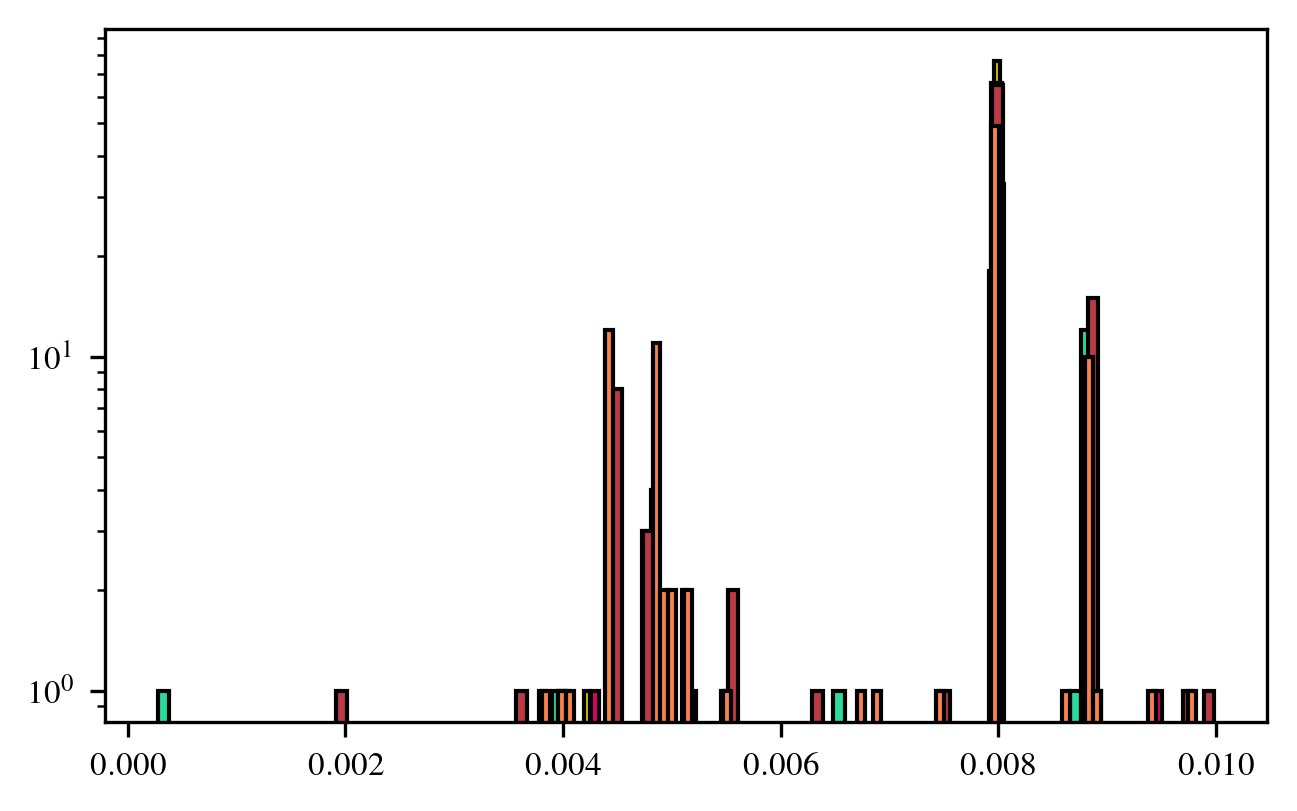

{'//YBCO_10mu_proton_7-0_25044_PIXE_1.jsonbe': array([0.00377832, 0.00384728, 0.00391624, 0.0039852 , 0.00405415,
        0.00412311, 0.00419207, 0.00426103, 0.00432999, 0.00439894,
        0.0044679 , 0.00453686, 0.00460582, 0.00467477, 0.00474373,
        0.00481269, 0.00488165, 0.00495061, 0.00501956, 0.00508852,
        0.00515748, 0.00522644, 0.0052954 , 0.00536435, 0.00543331,
        0.00550227, 0.00557123, 0.00564019, 0.00570914, 0.0057781 ,
        0.00584706, 0.00591602, 0.00598498, 0.00605393, 0.00612289,
        0.00619185, 0.00626081, 0.00632977, 0.00639872, 0.00646768,
        0.00653664, 0.0066056 , 0.00667456, 0.00674351, 0.00681247,
        0.00688143, 0.00695039, 0.00701935, 0.0070883 , 0.00715726,
        0.00722622, 0.00729518, 0.00736414, 0.00743309, 0.00750205,
        0.00757101, 0.00763997, 0.00770893, 0.00777788, 0.00784684,
        0.0079158 , 0.00798476, 0.00805372, 0.00812267, 0.00819163,
        0.00826059, 0.00832955, 0.00839851, 0.00846746, 0.00853642,
  

In [61]:
files = ['//YBCO_10mu_proton_7-0_25044_PIXE_1.json',
         '//YBCO_10mu_proton_8-5_20760_PIXE_1.json',
         '//YBCO_10mu_proton_10-0_9848_PIXE_1.json',
         '//YBCO_10mu_proton_12-0_26620_PIXE_1.json',
         '//YBCO_10mu_proton_14-0_19704_PIXE_1.json']
multi_histo(prm=PARAM_XRAY_L, files=files)
# array_to_histo(PARAM_XRAY_L, data['Ekin'],yscale='log')
# array_to_histo(data['Ekin'], mask_max=520)